### Create a SQL DB from a series of processed CSV files via SQLAlchemy.

The processed CSV files were imported from the WHO, UN, OECD, World Bank, loaded, processed and exported via Pandas


In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Create a list (array) with the names of the CSV files from the processed data location

In [102]:
datapath = os.path.join(os.getcwd(), "data2")

if os.path.isdir(datapath):
    datafiles = [f for f in os.listdir(datapath) if os.path.isfile(os.path.join(datapath, f))]

For these files, split the extension, capitalize and append them to a dictionary which will contain as key the name minus extension and as value the Pandas DataFrame

In [45]:
datadict = dict()

for f in datafiles:
    #print(f)
    datadict[((f.rsplit(".", 1)[0]).capitalize())] = pd.read_csv(os.path.join(datapath, f), index_col = "Country")

In [46]:
for key, val in datadict.items():
    print(key)

Anual_number_of_deaths_by_cause
Life_satisfaction_in_cantril_ladder_world_happiness_report_2021
Life_expectancy
Life_expectancy_at_birth
Extreme_poverty_headcount_ratio_vs_life_expectancy_at_birth
Human_development_index
Mortality_rate_under_5_per_1000_live_births
Suicide_mortality_rate_per_100000_population
Annual_co2_emissions
Average_total_years_of_schooling_for_adult_population


In [47]:
# find for each DB, the unique country/index entries
# which we convert to lists and then sets to find the
# intersection of the lists/sets

uniqndx = []

for key, val in datadict.items():
    uniqndx.append(list(datadict[key].index.unique()))


In [48]:
inter = [i for i in uniqndx[0]]
len(inter)

256

In [49]:
for i, val in enumerate(uniqndx):
    if i == 0:
        continue
    else:
        inter = list(set(inter).intersection(set(uniqndx[i])))
        

In [54]:
#inter = [i for i in uniqndx[0]]
inter = []

for i, val in enumerate(uniqndx):
    inter = list(set(inter).intersection(set(uniqndx[i]))) \
        if i != 0 else [i for i in uniqndx[0]]
    
    

In [61]:
country_options = [
    {"label" : str(val), "value" : str(val)} for val in countries
    ]

In [63]:
#country_options

In [64]:
datadict["Mortality_rate_under_5_per_1000_live_births"]

,Code,Year,Mortality_rate_under_5_per_1000_live_births
Country,,,
Afghanistan,AFG,1962,34.46
Afghanistan,AFG,1963,33.87
Afghanistan,AFG,1964,33.31
Afghanistan,AFG,1965,32.76
Afghanistan,AFG,1966,32.20
...,...,...,...
Zimbabwe,ZWE,2015,6.20
Zimbabwe,ZWE,2016,5.95
Zimbabwe,ZWE,2017,5.82


In [65]:
for key, val in datadict.items():
    print(key)

Anual_number_of_deaths_by_cause
Life_satisfaction_in_cantril_ladder_world_happiness_report_2021
Life_expectancy
Life_expectancy_at_birth
Extreme_poverty_headcount_ratio_vs_life_expectancy_at_birth
Human_development_index
Mortality_rate_under_5_per_1000_live_births
Suicide_mortality_rate_per_100000_population
Annual_co2_emissions
Average_total_years_of_schooling_for_adult_population


In [66]:
df = pd.DataFrame()

In [67]:
df = pd.concat(datadict.values(), axis = 0, join = "outer")
df2 = df.copy(deep = True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126657 entries, Afghanistan to Zimbabwe
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   Code                                                               121794 non-null  object 
 1   Year                                                               126657 non-null  int64  
 2   Number_of_executions_(amnesty_international)                       6686 non-null    object 
 3   Deaths_-_meningitis                                                6686 non-null    float64
 4   Deaths_-_lower_respiratory_infections                              6686 non-null    float64
 5   Deaths_-_intestinal_infectious_diseases                            6686 non-null    float64
 6   Deaths_-_protein-energy_malnutrition                               6686 non-null    float64
 7   Terr

We have to combine the data, appending columns, merging overlapping indices, and having NaN on ranges without associated ranged data

In [69]:
df.head()

,Code,Year,Number_of_executions_(amnesty_international),Deaths_-_meningitis,Deaths_-_lower_respiratory_infections,Deaths_-_intestinal_infectious_diseases,Deaths_-_protein-energy_malnutrition,Terrorism,Deaths_-_cardiovascular_diseases,Deaths_-_alzheimer_disease_and_other_dementias,...,Life_expectancy,Life_expectancy_at_birth,$1.90_per_day_-_share_of_population_below_poverty_line,"Life_expectancy_at_birth,_total_(years)","Total_population_(Gapminder,_HYDE_&_UN)",Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions,Average_total_years_of_schooling_for_adult_population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1990,0,6469.977091,22836.912346,295.382207,1607.703797,12.0,46498.085024,1959.215373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1991,0,6347.158764,22325.633931,303.866598,1558.132316,68.0,46967.361037,1987.812878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1992,0,6659.741428,23205.280750,317.750121,1617.721576,49.0,48355.558515,2025.102326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1993,0,8068.386263,28229.715397,333.978331,1931.808553,0.0,50072.563899,2064.827903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1994,0,9432.845127,32652.297630,348.419085,2351.629206,22.0,51416.815442,2101.020630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
list(df.index.unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andean Latin America',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australasia',
 'Australasia & Oceania',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Caribbean',
 'Central African Republic',
 'Central America & Caribbean',
 'Central Asia',
 'Central Europe',
 'Central Europe, Eastern Europe, and Central Asia',
 'Central Latin America',
 'Central Sub-Saharan Africa',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Czechoslovakia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic

### Check for NaNs

we're going to have NaNs since multiple dataframes span different time ranges. Since we do an union of the dataframes we're guaranteed to have some fields/columns without data depending on the year.
If there are any *Code* fields left with NaN, fill to *NUL*. For everything else fill them with 0.


In [71]:
df[df.isna().any(axis=1)]

,Code,Year,Number_of_executions_(amnesty_international),Deaths_-_meningitis,Deaths_-_lower_respiratory_infections,Deaths_-_intestinal_infectious_diseases,Deaths_-_protein-energy_malnutrition,Terrorism,Deaths_-_cardiovascular_diseases,Deaths_-_alzheimer_disease_and_other_dementias,...,Life_expectancy,Life_expectancy_at_birth,$1.90_per_day_-_share_of_population_below_poverty_line,"Life_expectancy_at_birth,_total_(years)","Total_population_(Gapminder,_HYDE_&_UN)",Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions,Average_total_years_of_schooling_for_adult_population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1990,0,6469.977091,22836.912346,295.382207,1607.703797,12.0,46498.085024,1959.215373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1991,0,6347.158764,22325.633931,303.866598,1558.132316,68.0,46967.361037,1987.812878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1992,0,6659.741428,23205.280750,317.750121,1617.721576,49.0,48355.558515,2025.102326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1993,0,8068.386263,28229.715397,333.978331,1931.808553,0.0,50072.563899,2064.827903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1994,0,9432.845127,32652.297630,348.419085,2351.629206,22.0,51416.815442,2101.020630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZWE,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
Zimbabwe,ZWE,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.2
Zimbabwe,ZWE,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.2


In [72]:
df["Code"].fillna("NUL", inplace = True)

In [73]:
df.loc["Samoa"]

,Code,Year,Number_of_executions_(amnesty_international),Deaths_-_meningitis,Deaths_-_lower_respiratory_infections,Deaths_-_intestinal_infectious_diseases,Deaths_-_protein-energy_malnutrition,Terrorism,Deaths_-_cardiovascular_diseases,Deaths_-_alzheimer_disease_and_other_dementias,...,Life_expectancy,Life_expectancy_at_birth,$1.90_per_day_-_share_of_population_below_poverty_line,"Life_expectancy_at_birth,_total_(years)","Total_population_(Gapminder,_HYDE_&_UN)",Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions,Average_total_years_of_schooling_for_adult_population
Country,,,,,,,,,,,,,,,,,,,,,
Samoa,WSM,1990,0,4.672467,46.534129,5.253355,4.484293,0.0,259.570046,23.323666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Samoa,WSM,1991,0,4.585645,46.336340,5.119805,4.423138,0.0,263.764889,24.018716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Samoa,WSM,1992,0,4.495094,46.201876,5.021106,4.373741,0.0,268.304118,24.637499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Samoa,WSM,1993,0,4.389071,46.002368,4.922772,4.318102,0.0,272.364513,25.275036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Samoa,WSM,1994,0,4.303682,46.048495,4.845737,4.272766,0.0,278.289959,26.050047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,WSM,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3
Samoa,WSM,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3
Samoa,WSM,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3


In [74]:
df[df.isna().any(axis=1)]

,Code,Year,Number_of_executions_(amnesty_international),Deaths_-_meningitis,Deaths_-_lower_respiratory_infections,Deaths_-_intestinal_infectious_diseases,Deaths_-_protein-energy_malnutrition,Terrorism,Deaths_-_cardiovascular_diseases,Deaths_-_alzheimer_disease_and_other_dementias,...,Life_expectancy,Life_expectancy_at_birth,$1.90_per_day_-_share_of_population_below_poverty_line,"Life_expectancy_at_birth,_total_(years)","Total_population_(Gapminder,_HYDE_&_UN)",Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions,Average_total_years_of_schooling_for_adult_population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1990,0,6469.977091,22836.912346,295.382207,1607.703797,12.0,46498.085024,1959.215373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1991,0,6347.158764,22325.633931,303.866598,1558.132316,68.0,46967.361037,1987.812878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1992,0,6659.741428,23205.280750,317.750121,1617.721576,49.0,48355.558515,2025.102326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1993,0,8068.386263,28229.715397,333.978331,1931.808553,0.0,50072.563899,2064.827903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1994,0,9432.845127,32652.297630,348.419085,2351.629206,22.0,51416.815442,2101.020630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZWE,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
Zimbabwe,ZWE,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.2
Zimbabwe,ZWE,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.2


In [75]:
df.fillna(0, inplace = True)

In [76]:
df[df.isna().any(axis=1)]

,Code,Year,Number_of_executions_(amnesty_international),Deaths_-_meningitis,Deaths_-_lower_respiratory_infections,Deaths_-_intestinal_infectious_diseases,Deaths_-_protein-energy_malnutrition,Terrorism,Deaths_-_cardiovascular_diseases,Deaths_-_alzheimer_disease_and_other_dementias,...,Life_expectancy,Life_expectancy_at_birth,$1.90_per_day_-_share_of_population_below_poverty_line,"Life_expectancy_at_birth,_total_(years)","Total_population_(Gapminder,_HYDE_&_UN)",Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions,Average_total_years_of_schooling_for_adult_population
Country,,,,,,,,,,,,,,,,,,,,,


In [77]:
df.head()

,Code,Year,Number_of_executions_(amnesty_international),Deaths_-_meningitis,Deaths_-_lower_respiratory_infections,Deaths_-_intestinal_infectious_diseases,Deaths_-_protein-energy_malnutrition,Terrorism,Deaths_-_cardiovascular_diseases,Deaths_-_alzheimer_disease_and_other_dementias,...,Life_expectancy,Life_expectancy_at_birth,$1.90_per_day_-_share_of_population_below_poverty_line,"Life_expectancy_at_birth,_total_(years)","Total_population_(Gapminder,_HYDE_&_UN)",Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions,Average_total_years_of_schooling_for_adult_population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1990,0,6469.977091,22836.912346,295.382207,1607.703797,12.0,46498.085024,1959.215373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,AFG,1991,0,6347.158764,22325.633931,303.866598,1558.132316,68.0,46967.361037,1987.812878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,AFG,1992,0,6659.741428,23205.280750,317.750121,1617.721576,49.0,48355.558515,2025.102326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,AFG,1993,0,8068.386263,28229.715397,333.978331,1931.808553,0.0,50072.563899,2064.827903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,AFG,1994,0,9432.845127,32652.297630,348.419085,2351.629206,22.0,51416.815442,2101.020630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
df.columns

Index(['Code', 'Year', 'Number_of_executions_(amnesty_international)',
       'Deaths_-_meningitis', 'Deaths_-_lower_respiratory_infections',
       'Deaths_-_intestinal_infectious_diseases',
       'Deaths_-_protein-energy_malnutrition', 'Terrorism',
       'Deaths_-_cardiovascular_diseases',
       'Deaths_-_alzheimer_disease_and_other_dementias',
       'Deaths_-_chronic_kidney_disease',
       'Deaths_-_chronic_respiratory_diseases',
       'Deaths_-_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_-_digestive_diseases', 'Deaths_-_hepatitis',
       'Deaths_-_neoplasms', 'Deaths_-_parkinson_disease',
       'Deaths_-_fire,_heat,_and_hot_substances', 'Deaths_-_malaria',
       'Deaths_-_drowning', 'Deaths_-_interpersonal_violence',
       'Deaths_-_hiv/aids', 'Deaths_-_drug_use_disorders',
       'Deaths_-_tuberculosis', 'Deaths_-_road_injuries',
       'Deaths_-_maternal_disorders', 'Deaths_-_neonatal_disorders',
       'Deaths_-_alcohol_use_disorders',
       'Deaths_-_

In [79]:
df.rename(columns = {"Life_satisfaction_in_Cantril_Ladder_(World_Happiness_Report_2021)" : "Life_satisfaction_world_happiness_report"}, inplace = True) 

In [80]:
df.rename(columns = {"$1.90_per_day_-_share_of_population_below_poverty_line" : "Share_of_population_below_poverty_line_$1.90_per_day"}, inplace = True)

In [81]:
df.rename(columns = {"Life_expectancy_at_birth,_total_(years)" : "Life_expectancy_at_birth_total"}, inplace = True)

In [82]:
df.rename(columns = {"Total_population_(Gapminder,_HYDE_&_UN)" : "Total_population"}, inplace = True)

In [83]:
df.rename(columns = {"Number_of_executions_(amnesty_international)" : "Number_of_executions"}, inplace = True)

In [84]:
df.head()

,Code,Year,Number_of_executions,Deaths_-_meningitis,Deaths_-_lower_respiratory_infections,Deaths_-_intestinal_infectious_diseases,Deaths_-_protein-energy_malnutrition,Terrorism,Deaths_-_cardiovascular_diseases,Deaths_-_alzheimer_disease_and_other_dementias,...,Life_expectancy,Life_expectancy_at_birth,Share_of_population_below_poverty_line_$1.90_per_day,Life_expectancy_at_birth_total,Total_population,Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions,Average_total_years_of_schooling_for_adult_population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1990,0,6469.977091,22836.912346,295.382207,1607.703797,12.0,46498.085024,1959.215373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,AFG,1991,0,6347.158764,22325.633931,303.866598,1558.132316,68.0,46967.361037,1987.812878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,AFG,1992,0,6659.741428,23205.280750,317.750121,1617.721576,49.0,48355.558515,2025.102326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,AFG,1993,0,8068.386263,28229.715397,333.978331,1931.808553,0.0,50072.563899,2064.827903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,AFG,1994,0,9432.845127,32652.297630,348.419085,2351.629206,22.0,51416.815442,2101.020630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
df.columns = df.columns.str.capitalize()

In [86]:
df.columns

Index(['Code', 'Year', 'Number_of_executions', 'Deaths_-_meningitis',
       'Deaths_-_lower_respiratory_infections',
       'Deaths_-_intestinal_infectious_diseases',
       'Deaths_-_protein-energy_malnutrition', 'Terrorism',
       'Deaths_-_cardiovascular_diseases',
       'Deaths_-_alzheimer_disease_and_other_dementias',
       'Deaths_-_chronic_kidney_disease',
       'Deaths_-_chronic_respiratory_diseases',
       'Deaths_-_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_-_digestive_diseases', 'Deaths_-_hepatitis',
       'Deaths_-_neoplasms', 'Deaths_-_parkinson_disease',
       'Deaths_-_fire,_heat,_and_hot_substances', 'Deaths_-_malaria',
       'Deaths_-_drowning', 'Deaths_-_interpersonal_violence',
       'Deaths_-_hiv/aids', 'Deaths_-_drug_use_disorders',
       'Deaths_-_tuberculosis', 'Deaths_-_road_injuries',
       'Deaths_-_maternal_disorders', 'Deaths_-_neonatal_disorders',
       'Deaths_-_alcohol_use_disorders',
       'Deaths_-_exposure_to_forces_of_na

### Export to SQLite via SQLAlchemy

But before that, make sure we have the right data-types because we can't change the the data types in SQLite DBs 

In [87]:
df.dtypes

Code                                                      object
Year                                                       int64
Number_of_executions                                      object
Deaths_-_meningitis                                      float64
Deaths_-_lower_respiratory_infections                    float64
Deaths_-_intestinal_infectious_diseases                  float64
Deaths_-_protein-energy_malnutrition                     float64
Terrorism                                                float64
Deaths_-_cardiovascular_diseases                         float64
Deaths_-_alzheimer_disease_and_other_dementias           float64
Deaths_-_chronic_kidney_disease                          float64
Deaths_-_chronic_respiratory_diseases                    float64
Deaths_-_cirrhosis_and_other_chronic_liver_diseases      float64
Deaths_-_digestive_diseases                              float64
Deaths_-_hepatitis                                       float64
Deaths_-_neoplasms       

In [88]:
df = df.astype({"Terrorism" : int})

In [89]:
df = df.convert_dtypes()

In [90]:
df["Number_of_executions"].dtypes

dtype('O')

The following
```python
pd.to_numeric(df["Number_of_executions"])
```
will result in an error. Position 1353 has the following entry: ```>1000``` for the number of executions in China. This is considered by China as a state secret, so the exact number is not known, but reliably above 1000.
Since we cannot plot non-numeric data, replace it by 1000. 

In [91]:
# see where the condition is taking place
df[df["Number_of_executions"] == ">1000"]

,Code,Year,Number_of_executions,Deaths_-_meningitis,Deaths_-_lower_respiratory_infections,Deaths_-_intestinal_infectious_diseases,Deaths_-_protein-energy_malnutrition,Terrorism,Deaths_-_cardiovascular_diseases,Deaths_-_alzheimer_disease_and_other_dementias,...,Life_expectancy,Life_expectancy_at_birth,Share_of_population_below_poverty_line_$1.90_per_day,Life_expectancy_at_birth_total,Total_population,Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_co2_emissions,Average_total_years_of_schooling_for_adult_population
Country,,,,,,,,,,,,,,,,,,,,,
China,CHN,2008,>1000,8673.427954,183240.303007,2991.033998,6724.751435,39,3260750.782576,320868.31961,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
China,CHN,2009,>1000,8659.700019,182093.237073,2988.629459,6748.766126,186,3440057.219481,339390.978348,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
China,CHN,2010,>1000,8622.086833,181129.979576,2980.2094,6825.04923,7,3610887.483164,356718.091101,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
China,CHN,2011,>1000,8491.940492,179081.159716,2934.718732,6939.214946,19,3744796.235626,374305.629942,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
China,CHN,2012,>1000,8361.419595,176033.604396,2888.92612,6992.596422,27,3844071.21134,390327.161343,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
China,CHN,2013,>1000,8253.350992,171388.799759,2881.996972,6987.501948,60,3872995.813656,402240.170531,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
China,CHN,2014,>1000,8215.543634,173295.378121,2855.650978,7228.677034,322,4039145.347638,423254.155915,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
China,CHN,2015,>1000,8087.921569,175697.177402,2827.783048,7508.831421,123,4221831.718575,446563.598431,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
China,CHN,2016,>1000,7825.99372,177439.510127,2802.874704,7794.814462,13,4344333.810036,470047.384945,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0


In [92]:
# So now where the string matches, replace the location by the value in the assignment
#
df.loc[df["Number_of_executions"] == ">1000", "Number_of_executions"] = 1000

In [93]:
# Now we should be able to convert to numeric, int
# df = df.astype({"Number_of_executions" : int})

# see where the condition is taking place
# df[df["Number_of_executions"] == ">1"]
df.loc[df["Number_of_executions"] == ">1", "Number_of_executions"] = 1

In [94]:
df = df.astype({"Number_of_executions" : int})

In [95]:
df.dtypes

Code                                                      string
Year                                                       Int64
Number_of_executions                                       int64
Deaths_-_meningitis                                      Float64
Deaths_-_lower_respiratory_infections                    Float64
Deaths_-_intestinal_infectious_diseases                  Float64
Deaths_-_protein-energy_malnutrition                     Float64
Terrorism                                                  Int64
Deaths_-_cardiovascular_diseases                         Float64
Deaths_-_alzheimer_disease_and_other_dementias           Float64
Deaths_-_chronic_kidney_disease                          Float64
Deaths_-_chronic_respiratory_diseases                    Float64
Deaths_-_cirrhosis_and_other_chronic_liver_diseases      Float64
Deaths_-_digestive_diseases                              Float64
Deaths_-_hepatitis                                       Float64
Deaths_-_neoplasms       

In [96]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126657 entries, Afghanistan to Zimbabwe
Data columns (total 47 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Code                                                   126657 non-null  string 
 1   Year                                                   126657 non-null  Int64  
 2   Number_of_executions                                   126657 non-null  int64  
 3   Deaths_-_meningitis                                    126657 non-null  Float64
 4   Deaths_-_lower_respiratory_infections                  126657 non-null  Float64
 5   Deaths_-_intestinal_infectious_diseases                126657 non-null  Float64
 6   Deaths_-_protein-energy_malnutrition                   126657 non-null  Float64
 7   Terrorism                                              126657 non-null  Int64  
 8   Deaths_-_cardiovascular_dis

In [98]:
from sqlalchemy import create_engine

In [38]:
engine = create_engine("sqlite:///deadline_database.db", echo=True)
sqlite_connection = engine.connect()

In [39]:
sqlite_table = "Deadline_database"

In [40]:
df.to_sql(sqlite_table, sqlite_connection, if_exists="replace")

2021-12-01 14:24:01,905 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Deadline_database")
2021-12-01 14:24:01,906 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 14:24:01,907 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Deadline_database")
2021-12-01 14:24:01,907 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 14:24:01,908 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-12-01 14:24:01,909 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 14:24:01,910 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("Deadline_database")
2021-12-01 14:24:01,910 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 14:24:01,913 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2021-12-01 14:24:01,914 INFO sqlalchemy.engine.Engine [raw sql] ('Deadline_database',)
2021-12-01 14:24:01,915 INFO sqlalchemy.engine.Engin

In [41]:
# close connection to DB
sqlite_connection.close()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130127 entries, Afghanistan to Zimbabwe
Data columns (total 48 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Code                                                   130127 non-null  string 
 1   Year                                                   130127 non-null  Int64  
 2   Number_of_executions                                   130127 non-null  int64  
 3   Deaths_-_meningitis                                    130127 non-null  Float64
 4   Deaths_-_lower_respiratory_infections                  130127 non-null  Float64
 5   Deaths_-_intestinal_infectious_diseases                130127 non-null  Float64
 6   Deaths_-_protein-energy_malnutrition                   130127 non-null  Float64
 7   Terrorism                                              130127 non-null  Int64  
 8   Deaths_-_cardiovascular_dis

In [43]:
df.columns = df.columns.str.replace("-", "")

In [44]:
for col in df.columns:
    print(col)

Code
Year
Number_of_executions
Deaths__meningitis
Deaths__lower_respiratory_infections
Deaths__intestinal_infectious_diseases
Deaths__proteinenergy_malnutrition
Terrorism
Deaths__cardiovascular_diseases
Deaths__alzheimer_disease_and_other_dementias
Deaths__chronic_kidney_disease
Deaths__chronic_respiratory_diseases
Deaths__cirrhosis_and_other_chronic_liver_diseases
Deaths__digestive_diseases
Deaths__hepatitis
Deaths__neoplasms
Deaths__parkinson_disease
Deaths__fire,_heat,_and_hot_substances
Deaths__malaria
Deaths__drowning
Deaths__interpersonal_violence
Deaths__hiv/aids
Deaths__drug_use_disorders
Deaths__tuberculosis
Deaths__road_injuries
Deaths__maternal_disorders
Deaths__neonatal_disorders
Deaths__alcohol_use_disorders
Deaths__exposure_to_forces_of_nature
Deaths__diarrheal_diseases
Deaths__environmental_heat_and_cold_exposure
Deaths__nutritional_deficiencies
Deaths__selfharm
Deaths__conflict_and_terrorism
Deaths__diabetes_mellitus
Deaths__poisonings
Average_annual_working_hours_per_w

In [45]:
df.columns = df.columns.str.replace(",", "")

In [46]:
df.columns = df.columns.str.replace("hiv/aids", "hiv")

In [47]:
df.columns = df.columns.str.replace("_\$1\.90", "_2USD")

/tmp/ipykernel_19094/3178930491.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace("_\$1\.90", "_2USD")


In [48]:
for col in df.columns:
    print(col)

Code
Year
Number_of_executions
Deaths__meningitis
Deaths__lower_respiratory_infections
Deaths__intestinal_infectious_diseases
Deaths__proteinenergy_malnutrition
Terrorism
Deaths__cardiovascular_diseases
Deaths__alzheimer_disease_and_other_dementias
Deaths__chronic_kidney_disease
Deaths__chronic_respiratory_diseases
Deaths__cirrhosis_and_other_chronic_liver_diseases
Deaths__digestive_diseases
Deaths__hepatitis
Deaths__neoplasms
Deaths__parkinson_disease
Deaths__fire_heat_and_hot_substances
Deaths__malaria
Deaths__drowning
Deaths__interpersonal_violence
Deaths__hiv
Deaths__drug_use_disorders
Deaths__tuberculosis
Deaths__road_injuries
Deaths__maternal_disorders
Deaths__neonatal_disorders
Deaths__alcohol_use_disorders
Deaths__exposure_to_forces_of_nature
Deaths__diarrheal_diseases
Deaths__environmental_heat_and_cold_exposure
Deaths__nutritional_deficiencies
Deaths__selfharm
Deaths__conflict_and_terrorism
Deaths__diabetes_mellitus
Deaths__poisonings
Average_annual_working_hours_per_worker
L

In [49]:
df.columns = df.columns.str.replace("USD", "usd")
for col in df.columns:
    print(col)

Code
Year
Number_of_executions
Deaths__meningitis
Deaths__lower_respiratory_infections
Deaths__intestinal_infectious_diseases
Deaths__proteinenergy_malnutrition
Terrorism
Deaths__cardiovascular_diseases
Deaths__alzheimer_disease_and_other_dementias
Deaths__chronic_kidney_disease
Deaths__chronic_respiratory_diseases
Deaths__cirrhosis_and_other_chronic_liver_diseases
Deaths__digestive_diseases
Deaths__hepatitis
Deaths__neoplasms
Deaths__parkinson_disease
Deaths__fire_heat_and_hot_substances
Deaths__malaria
Deaths__drowning
Deaths__interpersonal_violence
Deaths__hiv
Deaths__drug_use_disorders
Deaths__tuberculosis
Deaths__road_injuries
Deaths__maternal_disorders
Deaths__neonatal_disorders
Deaths__alcohol_use_disorders
Deaths__exposure_to_forces_of_nature
Deaths__diarrheal_diseases
Deaths__environmental_heat_and_cold_exposure
Deaths__nutritional_deficiencies
Deaths__selfharm
Deaths__conflict_and_terrorism
Deaths__diabetes_mellitus
Deaths__poisonings
Average_annual_working_hours_per_worker
L

In [50]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///deadline_database.db", echo=True)
sqlite_connection = engine.connect()

In [51]:
sqlite_table = "Deadline_database"

df.to_sql(sqlite_table, sqlite_connection, if_exists="replace")

2021-12-01 14:24:06,376 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Deadline_database")
2021-12-01 14:24:06,377 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 14:24:06,378 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Deadline_database")
2021-12-01 14:24:06,379 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 14:24:06,380 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-12-01 14:24:06,381 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 14:24:06,383 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("Deadline_database")
2021-12-01 14:24:06,383 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 14:24:06,388 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2021-12-01 14:24:06,388 INFO sqlalchemy.engine.Engine [raw sql] ('Deadline_database',)
2021-12-01 14:24:06,390 INFO sqlalchemy.engine.Engin

In [52]:
# close connection to DB
sqlite_connection.close()

In [53]:
# df[df.index.str.startswith("A")].tail(2000)
# for mismatching names, i.e, "Bosnia and Herzegovina" and "Bosnia-Herzegovina", rename index
# df.rename(index={'alpha': 'mu'})
# df.rename(index = {"Bosnia-Herzegovina" : "Bosnia and Herzegovina"}, inplace = True)

In [54]:
# Remove limitation for max rows
pd.set_option('display.max_rows', None)

In [55]:
# df[df.index.str.startswith("Bos")].tail(1000)

In [56]:
df.loc["Bosnia and Herzegovina", "Code"] = "BIH"

In [57]:
df.sort_values(by=["Country", "Year"], inplace = True)

In [58]:
#df[df.index.str.startswith("Argentina")].tail(1000)
df.rename(index = {"Argentina (Urban)" : "Argentina"}, inplace = True)

In [59]:
df.sort_values(by=["Country", "Year"], inplace = True)

In [60]:
#df[df.index.str.startswith("Argentina")].tail(1000)
df.loc["Argentina", "Code"] = "ARG"

In [61]:
#df[df.index.str.startswith("Czech")].tail(1000)

In [62]:
# pandas dataframe column .unique()
# then convert index to list

countrylist = df.index.unique().to_list()

In [63]:
for c in countrylist:
    print(c)

Abkhazia
Afghanistan
Africa
Africa Eastern and Southern
Africa Western and Central
Akrotiri and Dhekelia
Albania
Algeria
American Samoa
Americas
Andean Latin America
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Arab World
Argentina
Armenia
Aruba
Asia
Asia (excl. China & India)
Australasia
Australasia & Oceania
Australia
Austria
Austria-Hungary
Azerbaijan
Baden
Bahamas
Bahrain
Bangladesh
Barbados
Bavaria
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Bouvet Island
Brazil
British Indian Ocean Territory
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Caribbean
Caribbean Small States
Cayman Islands
Central African Republic
Central America & Caribbean
Central Asia
Central Europe
Central Europe and the Baltics
Central Europe, Eastern Europe, and Central Asia
Central Latin America
Central Sub-Saharan Africa
Chad
Channel Islands
Chile
China
China (Rural)
China (Urban)


In [64]:
df.drop("Åland Islands", inplace = True)

In [65]:
droplist = ["Wuerttemburg", "World (excluding China)", "USSR", "West Germany (FRG)", \
            "West Germany", "Upper middle income", "Pre-demographic dividend", "Post-demographic dividend", "OECD members", \
            "Mecklenburg Schwerin", "Lower middle income", "Low-middle SDI", "Low income", "Low SDI", "Low & middle income", \
            "Late-demographic dividend", "International", "International transport", "IBRD only", "IDA & IBRD total", \
            "IDA blend", "IDA total", "Europe (excl. EU-28)", "Europe (excl. EU-27)", "Europe & Central Asia (excluding high income)", \
            "Europe & Central Asia (IDA & IBRD)", "High-middle SDI", "High income", "High-income", "High SDI", \
            "Hesse Electoral", "Hesse Grand Ducal", "High-income Asia Pacific", "Early-demographic dividend", "EU-27", "EU-28", \
            "Austria-Hungary"]

In [66]:
for d in droplist:
    df.drop(d, inplace = True)

In [67]:
countrylist = df.index.unique().to_list()

In [68]:
for c in countrylist:
    print(c)

Abkhazia
Afghanistan
Africa
Africa Eastern and Southern
Africa Western and Central
Akrotiri and Dhekelia
Albania
Algeria
American Samoa
Americas
Andean Latin America
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Arab World
Argentina
Armenia
Aruba
Asia
Asia (excl. China & India)
Australasia
Australasia & Oceania
Australia
Austria
Azerbaijan
Baden
Bahamas
Bahrain
Bangladesh
Barbados
Bavaria
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Bouvet Island
Brazil
British Indian Ocean Territory
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Caribbean
Caribbean Small States
Cayman Islands
Central African Republic
Central America & Caribbean
Central Asia
Central Europe
Central Europe and the Baltics
Central Europe, Eastern Europe, and Central Asia
Central Latin America
Central Sub-Saharan Africa
Chad
Channel Islands
Chile
China
China (Rural)
China (Urban)
Christmas Island

In [69]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///deadline_database.db", echo=True)
sqlite_connection = engine.connect()

In [70]:
sqlite_table = "Deadline_database"

df.to_sql(sqlite_table, sqlite_connection, if_exists="replace")

2021-12-01 14:24:12,706 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Deadline_database")
2021-12-01 14:24:12,707 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 14:24:12,708 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Deadline_database")
2021-12-01 14:24:12,708 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 14:24:12,709 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-12-01 14:24:12,710 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 14:24:12,711 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("Deadline_database")
2021-12-01 14:24:12,711 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 14:24:12,714 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2021-12-01 14:24:12,714 INFO sqlalchemy.engine.Engine [raw sql] ('Deadline_database',)
2021-12-01 14:24:12,715 INFO sqlalchemy.engine.Engin

In [71]:
# close connection to DB
sqlite_connection.close()

In [72]:
for key, val in datadict.items():
    print(key)

Anual_number_of_deaths_by_cause
Avg_annual_working_hours_per_worker
Life_satisfaction_in_cantril_ladder_world_happiness_report_2021
Life_expectancy
Life_expectancy_at_birth
Extreme_poverty_headcount_ratio_vs_life_expectancy_at_birth
Human_development_index
Mortality_rate_under_5_per_1000_live_births
Suicide_mortality_rate_per_100000_population
Annual_co2_emissions
Average_total_years_of_schooling_for_adult_population


In [73]:
datadict = dict()

for f in datafiles:
    #print(f)
    datadict[((f.rsplit(".", 1)[0]).capitalize())] = pd.read_csv(os.path.join(datapath, f), index_col = "Country")

In [79]:
for key, val in datadict.items():
    val.drop(columns="Code", inplace = True)

In [82]:
datadict["Annual_co2_emissions"].tail(5)

,Year,Annual_CO2_emissions
Country,,
Zimbabwe,2016,10737567
Zimbabwe,2017,9581633
Zimbabwe,2018,11854367
Zimbabwe,2019,10949084
Zimbabwe,2020,10531342


In [83]:
datadict["Human_development_index"].tail(5)

,Year,Human_development_index
Country,,
Zimbabwe,2013,0.516
Zimbabwe,2014,0.525
Zimbabwe,2015,0.529
Zimbabwe,2016,0.532
Zimbabwe,2017,0.535


In [84]:
#df = pd.concat(datadict.values(), axis = 0, join = "outer")
#df2 = df.copy(deep = True)

In [96]:
df = pd.DataFrame()

In [123]:
for key, val in datadict.items():
    print(key)

Anual_number_of_deaths_by_cause
Avg_annual_working_hours_per_worker
Life_satisfaction_in_cantril_ladder_world_happiness_report_2021
Life_expectancy
Life_expectancy_at_birth
Extreme_poverty_headcount_ratio_vs_life_expectancy_at_birth
Human_development_index
Mortality_rate_under_5_per_1000_live_births
Suicide_mortality_rate_per_100000_population
Annual_co2_emissions
Average_total_years_of_schooling_for_adult_population


In [126]:
df = pd.merge(left=datadict["Anual_number_of_deaths_by_cause"], right=datadict["Avg_annual_working_hours_per_worker"], how="outer", on=["Year", "Country"])

In [133]:
df = pd.merge(left=df, right=datadict["Life_satisfaction_in_cantril_ladder_world_happiness_report_2021"], how="outer", on=["Year", "Country"])

In [134]:
df = pd.merge(left=df, right=datadict["Life_expectancy"], how="outer", on=["Year", "Country"])

In [135]:
df = pd.merge(left=df, right=datadict["Life_expectancy_at_birth"], how="outer", on=["Year", "Country"])

In [136]:
df = pd.merge(left=df, right=datadict["Extreme_poverty_headcount_ratio_vs_life_expectancy_at_birth"], how="outer", on=["Year", "Country"])

In [137]:
df = pd.merge(left=df, right=datadict["Human_development_index"], how="outer", on=["Year", "Country"])

In [138]:
df = pd.merge(left=df, right=datadict["Mortality_rate_under_5_per_1000_live_births"], how="outer", on=["Year", "Country"])

In [139]:
df = pd.merge(left=df, right=datadict["Suicide_mortality_rate_per_100000_population"], how="outer", on=["Year", "Country"])

In [140]:
df = pd.merge(left=df, right=datadict["Annual_co2_emissions"], how="outer", on=["Year", "Country"])

In [141]:
df = pd.merge(left=df, right=datadict["Average_total_years_of_schooling_for_adult_population"], how="outer", on=["Year", "Country"])

In [142]:
df.head()

,Year,Number_of_executions_(amnesty_international),Deaths_-_meningitis,Deaths_-_lower_respiratory_infections,Deaths_-_intestinal_infectious_diseases,Deaths_-_protein-energy_malnutrition,Terrorism,Deaths_-_cardiovascular_diseases,Deaths_-_alzheimer_disease_and_other_dementias,Deaths_-_chronic_kidney_disease,...,Life_expectancy,Life_expectancy_at_birth,$1.90_per_day_-_share_of_population_below_poverty_line,"Life_expectancy_at_birth,_total_(years)","Total_population_(Gapminder,_HYDE_&_UN)",Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions,Average_total_years_of_schooling_for_adult_population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1990,0,6469.977091,22836.912346,295.382207,1607.703797,12.0,46498.085024,1959.215373,3155.356340,...,50.331,50.331,0.0,50.331,12412311.0,NaN,17.77,NaN,2603238.0,1.49
Afghanistan,1991,0,6347.158764,22325.633931,303.866598,1558.132316,68.0,46967.361037,1987.812878,3124.082631,...,50.999,50.999,0.0,50.999,13299016.0,NaN,17.17,NaN,2427366.0,1.60
Afghanistan,1992,0,6659.741428,23205.280750,317.750121,1617.721576,49.0,48355.558515,2025.102326,3192.278428,...,51.641,51.641,0.0,51.641,14485543.0,NaN,16.59,NaN,1379462.0,1.60
Afghanistan,1993,0,8068.386263,28229.715397,333.978331,1931.808553,0.0,50072.563899,2064.827903,3343.974014,...,52.256,52.256,0.0,52.256,15816601.0,NaN,16.04,NaN,1333055.0,1.70
Afghanistan,1994,0,9432.845127,32652.297630,348.419085,2351.629206,22.0,51416.815442,2101.020630,3480.299710,...,52.842,52.842,0.0,52.842,17075728.0,NaN,15.52,NaN,1281602.0,1.80


In [143]:
df.fillna(0, inplace=True)

In [144]:
df.columns

Index(['Year', 'Number_of_executions_(amnesty_international)',
       'Deaths_-_meningitis', 'Deaths_-_lower_respiratory_infections',
       'Deaths_-_intestinal_infectious_diseases',
       'Deaths_-_protein-energy_malnutrition', 'Terrorism',
       'Deaths_-_cardiovascular_diseases',
       'Deaths_-_alzheimer_disease_and_other_dementias',
       'Deaths_-_chronic_kidney_disease',
       'Deaths_-_chronic_respiratory_diseases',
       'Deaths_-_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_-_digestive_diseases', 'Deaths_-_hepatitis',
       'Deaths_-_neoplasms', 'Deaths_-_parkinson_disease',
       'Deaths_-_fire,_heat,_and_hot_substances', 'Deaths_-_malaria',
       'Deaths_-_drowning', 'Deaths_-_interpersonal_violence',
       'Deaths_-_hiv/aids', 'Deaths_-_drug_use_disorders',
       'Deaths_-_tuberculosis', 'Deaths_-_road_injuries',
       'Deaths_-_maternal_disorders', 'Deaths_-_neonatal_disorders',
       'Deaths_-_alcohol_use_disorders',
       'Deaths_-_exposure

In [145]:
df.rename(columns={"Number_of_executions_(amnesty_international)" : "Number_of_executions", "Life_satisfaction_in_Cantril_Ladder_(World_Happiness_Report_2021)" : "Life_satisfaction", "$1.90_per_day_-_share_of_population_below_poverty_line" : "Share_of_population_below_poverty_line_2USD_per_day", "Total_population_(Gapminder,_HYDE_&_UN)" : "Total_population"}, inplace=True)

In [146]:
df.columns

Index(['Year', 'Number_of_executions', 'Deaths_-_meningitis',
       'Deaths_-_lower_respiratory_infections',
       'Deaths_-_intestinal_infectious_diseases',
       'Deaths_-_protein-energy_malnutrition', 'Terrorism',
       'Deaths_-_cardiovascular_diseases',
       'Deaths_-_alzheimer_disease_and_other_dementias',
       'Deaths_-_chronic_kidney_disease',
       'Deaths_-_chronic_respiratory_diseases',
       'Deaths_-_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_-_digestive_diseases', 'Deaths_-_hepatitis',
       'Deaths_-_neoplasms', 'Deaths_-_parkinson_disease',
       'Deaths_-_fire,_heat,_and_hot_substances', 'Deaths_-_malaria',
       'Deaths_-_drowning', 'Deaths_-_interpersonal_violence',
       'Deaths_-_hiv/aids', 'Deaths_-_drug_use_disorders',
       'Deaths_-_tuberculosis', 'Deaths_-_road_injuries',
       'Deaths_-_maternal_disorders', 'Deaths_-_neonatal_disorders',
       'Deaths_-_alcohol_use_disorders',
       'Deaths_-_exposure_to_forces_of_nature', '

In [147]:
df.columns = df.columns.str.replace("_-_", "_")

In [148]:
df.columns

Index(['Year', 'Number_of_executions', 'Deaths_meningitis',
       'Deaths_lower_respiratory_infections',
       'Deaths_intestinal_infectious_diseases',
       'Deaths_protein-energy_malnutrition', 'Terrorism',
       'Deaths_cardiovascular_diseases',
       'Deaths_alzheimer_disease_and_other_dementias',
       'Deaths_chronic_kidney_disease', 'Deaths_chronic_respiratory_diseases',
       'Deaths_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_digestive_diseases', 'Deaths_hepatitis', 'Deaths_neoplasms',
       'Deaths_parkinson_disease', 'Deaths_fire,_heat,_and_hot_substances',
       'Deaths_malaria', 'Deaths_drowning', 'Deaths_interpersonal_violence',
       'Deaths_hiv/aids', 'Deaths_drug_use_disorders', 'Deaths_tuberculosis',
       'Deaths_road_injuries', 'Deaths_maternal_disorders',
       'Deaths_neonatal_disorders', 'Deaths_alcohol_use_disorders',
       'Deaths_exposure_to_forces_of_nature', 'Deaths_diarrheal_diseases',
       'Deaths_environmental_heat_and_cold_

In [149]:
df.rename(columns={"Deaths_hiv/aids" : "Deaths_aids"}, inplace = True)

In [150]:
df.columns = df.columns.str.replace("-","_")

In [151]:
df.rename(columns={"Life_expectancy_at_birth,_total_(years)" : "Total_life_expectancy_at_birth_in_years"}, inplace = True)

In [152]:
df.rename(columns={"Deaths_protein-energy_malnutrition" : "Deaths_protein_energy_malnutrition"}, inplace = True)

In [153]:
df.rename(columns={"Deaths_fire,_heat,_and_hot_substances" : "Deaths_by_fire_and_heat"}, inplace=True)

In [154]:
df.columns

Index(['Year', 'Number_of_executions', 'Deaths_meningitis',
       'Deaths_lower_respiratory_infections',
       'Deaths_intestinal_infectious_diseases',
       'Deaths_protein_energy_malnutrition', 'Terrorism',
       'Deaths_cardiovascular_diseases',
       'Deaths_alzheimer_disease_and_other_dementias',
       'Deaths_chronic_kidney_disease', 'Deaths_chronic_respiratory_diseases',
       'Deaths_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_digestive_diseases', 'Deaths_hepatitis', 'Deaths_neoplasms',
       'Deaths_parkinson_disease', 'Deaths_by_fire_and_heat', 'Deaths_malaria',
       'Deaths_drowning', 'Deaths_interpersonal_violence', 'Deaths_aids',
       'Deaths_drug_use_disorders', 'Deaths_tuberculosis',
       'Deaths_road_injuries', 'Deaths_maternal_disorders',
       'Deaths_neonatal_disorders', 'Deaths_alcohol_use_disorders',
       'Deaths_exposure_to_forces_of_nature', 'Deaths_diarrheal_diseases',
       'Deaths_environmental_heat_and_cold_exposure',
       

In [156]:
df.drop(columns="Unnamed: 0", inplace = True)

In [157]:
df.columns

Index(['Year', 'Number_of_executions', 'Deaths_meningitis',
       'Deaths_lower_respiratory_infections',
       'Deaths_intestinal_infectious_diseases',
       'Deaths_protein_energy_malnutrition', 'Terrorism',
       'Deaths_cardiovascular_diseases',
       'Deaths_alzheimer_disease_and_other_dementias',
       'Deaths_chronic_kidney_disease', 'Deaths_chronic_respiratory_diseases',
       'Deaths_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_digestive_diseases', 'Deaths_hepatitis', 'Deaths_neoplasms',
       'Deaths_parkinson_disease', 'Deaths_by_fire_and_heat', 'Deaths_malaria',
       'Deaths_drowning', 'Deaths_interpersonal_violence', 'Deaths_aids',
       'Deaths_drug_use_disorders', 'Deaths_tuberculosis',
       'Deaths_road_injuries', 'Deaths_maternal_disorders',
       'Deaths_neonatal_disorders', 'Deaths_alcohol_use_disorders',
       'Deaths_exposure_to_forces_of_nature', 'Deaths_diarrheal_diseases',
       'Deaths_environmental_heat_and_cold_exposure',
       

In [158]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///deadline_database2.db", echo=True)
sqlite_connection = engine.connect()

In [159]:
sqlite_table = "Deadline_database"

df.to_sql(sqlite_table, sqlite_connection, if_exists="replace")

2021-12-01 15:23:41,239 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Deadline_database")
2021-12-01 15:23:41,240 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 15:23:41,241 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Deadline_database")
2021-12-01 15:23:41,241 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 15:23:41,245 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Deadline_database" (
	"Country" TEXT, 
	"Year" BIGINT, 
	"Number_of_executions" TEXT, 
	"Deaths_meningitis" FLOAT, 
	"Deaths_lower_respiratory_infections" FLOAT, 
	"Deaths_intestinal_infectious_diseases" FLOAT, 
	"Deaths_protein_energy_malnutrition" FLOAT, 
	"Terrorism" FLOAT, 
	"Deaths_cardiovascular_diseases" FLOAT, 
	"Deaths_alzheimer_disease_and_other_dementias" FLOAT, 
	"Deaths_chronic_kidney_disease" FLOAT, 
	"Deaths_chronic_respiratory_diseases" FLOAT, 
	"Deaths_cirrhosis_and_other_chronic_liver_diseases" FLOAT, 
	"Deaths_digestive_diseases" FLOAT, 
	"Deaths_hepatitis" FLOAT, 
	"Deaths_n

In [160]:
# close connection to DB
sqlite_connection.close()

In [161]:
df[df.isna().any(axis=1)]

,Year,Number_of_executions,Deaths_meningitis,Deaths_lower_respiratory_infections,Deaths_intestinal_infectious_diseases,Deaths_protein_energy_malnutrition,Terrorism,Deaths_cardiovascular_diseases,Deaths_alzheimer_disease_and_other_dementias,Deaths_chronic_kidney_disease,...,Life_expectancy,Life_expectancy_at_birth,Share_of_population_below_poverty_line_2USD_per_day,Total_life_expectancy_at_birth_in_years,Total_population,Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions,Average_total_years_of_schooling_for_adult_population
Country,,,,,,,,,,,,,,,,,,,,,


In [162]:
df[df["Number_of_executions"] == ">1000"]

,Year,Number_of_executions,Deaths_meningitis,Deaths_lower_respiratory_infections,Deaths_intestinal_infectious_diseases,Deaths_protein_energy_malnutrition,Terrorism,Deaths_cardiovascular_diseases,Deaths_alzheimer_disease_and_other_dementias,Deaths_chronic_kidney_disease,...,Life_expectancy,Life_expectancy_at_birth,Share_of_population_below_poverty_line_2USD_per_day,Total_life_expectancy_at_birth_in_years,Total_population,Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions,Average_total_years_of_schooling_for_adult_population
Country,,,,,,,,,,,,,,,,,,,,,
China,2008,>1000,8673.427954,183240.303007,2991.033998,6724.751435,39.0,3.260751e+06,320868.319610,127045.252699,...,73.835,73.835,14.856890,73.835,1.353569e+09,0.685,1.85,11.1,7.496832e+09,7.0
China,2009,>1000,8659.700019,182093.237073,2988.629459,6748.766126,186.0,3.440057e+06,339390.978348,134184.739448,...,74.119,74.119,13.135860,74.119,1.361169e+09,0.694,1.71,10.7,7.886533e+09,7.1
China,2010,>1000,8622.086833,181129.979576,2980.209400,6825.049230,7.0,3.610887e+06,356718.091101,141397.114597,...,74.409,74.409,11.205410,74.409,1.368811e+09,0.706,1.58,10.2,8.616653e+09,7.3
China,2011,>1000,8491.940492,179081.159716,2934.718732,6939.214946,19.0,3.744796e+06,374305.629942,147901.977503,...,74.708,74.708,7.929667,74.708,1.376498e+09,0.714,1.46,9.6,9.528556e+09,7.4
China,2012,>1000,8361.419595,176033.604396,2888.926120,6992.596422,27.0,3.844071e+06,390327.161343,153575.312678,...,75.013,75.013,6.496901,75.013,1.384206e+09,0.722,1.35,9.0,9.775622e+09,7.5
China,2013,>1000,8253.350992,171388.799759,2881.996972,6987.501948,60.0,3.872996e+06,402240.170531,156896.769962,...,75.321,75.321,1.863086,75.321,1.391883e+09,0.729,1.25,8.6,9.952744e+09,7.5
China,2014,>1000,8215.543634,173295.378121,2855.650978,7228.677034,322.0,4.039145e+06,423254.155915,164840.374441,...,75.629,75.629,1.361431,75.629,1.399454e+09,0.738,1.16,8.4,9.985583e+09,7.6
China,2015,>1000,8087.921569,175697.177402,2827.783048,7508.831421,123.0,4.221832e+06,446563.598431,173101.170930,...,75.928,75.928,0.729980,75.928,1.406848e+09,0.743,1.07,8.1,9.848420e+09,7.7
China,2016,>1000,7825.993720,177439.510127,2802.874704,7794.814462,13.0,4.344334e+06,470047.384945,178045.715310,...,76.210,76.210,0.525378,76.210,1.414049e+09,0.748,0.99,8.2,9.720444e+09,7.8


In [163]:
df["Number_of_executions"].dtypes

dtype('O')

The following
```python
pd.to_numeric(df["Number_of_executions"])
```
will result in an error. Position 1353 has the following entry: ```>1000``` for the number of executions in China. This is considered by China as a state secret, so the exact number is not known, but reliably above 1000.
Since we cannot plot non-numeric data, replace it by 1000. 

In [164]:
# see where the condition is taking place
df[df["Number_of_executions"] == ">1000"]

,Year,Number_of_executions,Deaths_meningitis,Deaths_lower_respiratory_infections,Deaths_intestinal_infectious_diseases,Deaths_protein_energy_malnutrition,Terrorism,Deaths_cardiovascular_diseases,Deaths_alzheimer_disease_and_other_dementias,Deaths_chronic_kidney_disease,...,Life_expectancy,Life_expectancy_at_birth,Share_of_population_below_poverty_line_2USD_per_day,Total_life_expectancy_at_birth_in_years,Total_population,Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_CO2_emissions,Average_total_years_of_schooling_for_adult_population
Country,,,,,,,,,,,,,,,,,,,,,
China,2008,>1000,8673.427954,183240.303007,2991.033998,6724.751435,39.0,3.260751e+06,320868.319610,127045.252699,...,73.835,73.835,14.856890,73.835,1.353569e+09,0.685,1.85,11.1,7.496832e+09,7.0
China,2009,>1000,8659.700019,182093.237073,2988.629459,6748.766126,186.0,3.440057e+06,339390.978348,134184.739448,...,74.119,74.119,13.135860,74.119,1.361169e+09,0.694,1.71,10.7,7.886533e+09,7.1
China,2010,>1000,8622.086833,181129.979576,2980.209400,6825.049230,7.0,3.610887e+06,356718.091101,141397.114597,...,74.409,74.409,11.205410,74.409,1.368811e+09,0.706,1.58,10.2,8.616653e+09,7.3
China,2011,>1000,8491.940492,179081.159716,2934.718732,6939.214946,19.0,3.744796e+06,374305.629942,147901.977503,...,74.708,74.708,7.929667,74.708,1.376498e+09,0.714,1.46,9.6,9.528556e+09,7.4
China,2012,>1000,8361.419595,176033.604396,2888.926120,6992.596422,27.0,3.844071e+06,390327.161343,153575.312678,...,75.013,75.013,6.496901,75.013,1.384206e+09,0.722,1.35,9.0,9.775622e+09,7.5
China,2013,>1000,8253.350992,171388.799759,2881.996972,6987.501948,60.0,3.872996e+06,402240.170531,156896.769962,...,75.321,75.321,1.863086,75.321,1.391883e+09,0.729,1.25,8.6,9.952744e+09,7.5
China,2014,>1000,8215.543634,173295.378121,2855.650978,7228.677034,322.0,4.039145e+06,423254.155915,164840.374441,...,75.629,75.629,1.361431,75.629,1.399454e+09,0.738,1.16,8.4,9.985583e+09,7.6
China,2015,>1000,8087.921569,175697.177402,2827.783048,7508.831421,123.0,4.221832e+06,446563.598431,173101.170930,...,75.928,75.928,0.729980,75.928,1.406848e+09,0.743,1.07,8.1,9.848420e+09,7.7
China,2016,>1000,7825.993720,177439.510127,2802.874704,7794.814462,13.0,4.344334e+06,470047.384945,178045.715310,...,76.210,76.210,0.525378,76.210,1.414049e+09,0.748,0.99,8.2,9.720444e+09,7.8


In [165]:
# So now where the string matches, replace the location by the value in the assignment
#
df.loc[df["Number_of_executions"] == ">1000", "Number_of_executions"] = 1000

In [166]:
# Now we should be able to convert to numeric, int
# df = df.astype({"Number_of_executions" : int})

# see where the condition is taking place
# df[df["Number_of_executions"] == ">1"]
df.loc[df["Number_of_executions"] == ">1", "Number_of_executions"] = 1

In [167]:
df = df.astype({"Number_of_executions" : int})

In [168]:
df.dtypes

Year                                                       int64
Number_of_executions                                       int64
Deaths_meningitis                                        float64
Deaths_lower_respiratory_infections                      float64
Deaths_intestinal_infectious_diseases                    float64
Deaths_protein_energy_malnutrition                       float64
Terrorism                                                float64
Deaths_cardiovascular_diseases                           float64
Deaths_alzheimer_disease_and_other_dementias             float64
Deaths_chronic_kidney_disease                            float64
Deaths_chronic_respiratory_diseases                      float64
Deaths_cirrhosis_and_other_chronic_liver_diseases        float64
Deaths_digestive_diseases                                float64
Deaths_hepatitis                                         float64
Deaths_neoplasms                                         float64
Deaths_parkinson_disease 

In [169]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///deadline_database2.db", echo=True)
sqlite_connection = engine.connect()

In [170]:
sqlite_table = "Deadline_database"

df.to_sql(sqlite_table, sqlite_connection, if_exists="replace")

2021-12-01 15:26:14,736 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Deadline_database")
2021-12-01 15:26:14,737 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 15:26:14,738 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Deadline_database")
2021-12-01 15:26:14,739 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 15:26:14,741 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-12-01 15:26:14,741 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 15:26:14,743 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("Deadline_database")
2021-12-01 15:26:14,743 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-01 15:26:14,748 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2021-12-01 15:26:14,749 INFO sqlalchemy.engine.Engine [raw sql] ('Deadline_database',)
2021-12-01 15:26:14,752 INFO sqlalchemy.engine.Engin

In [171]:
# close connection to DB
sqlite_connection.close()

<AxesSubplot:title={'center':'Portugal meningitis deaths from 1990 to 2018'}, xlabel='Year'>

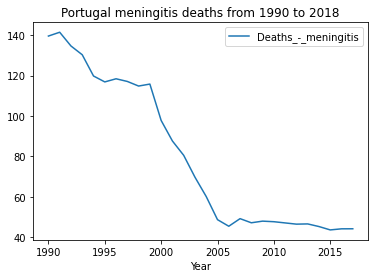

In [100]:
df.loc["Portugal"].plot(x="Year", y="Deaths_-_meningitis", title="Portugal meningitis deaths from 1990 to 2018")

<AxesSubplot:title={'center':'Portugal meningitis deaths from 1990 to 2018'}, xlabel='Year'>

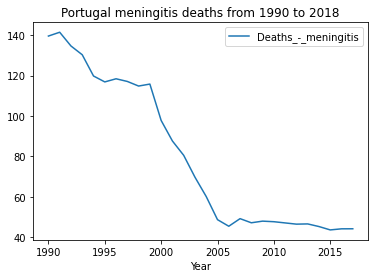

In [165]:
df.loc["Portugal"].plot(x="Year", y="Deaths_-_meningitis", title="Portugal meningitis deaths from 1990 to 2018")

In [166]:
df.columns

Index(['Code', 'Year', 'Number_of_executions_(amnesty_international)',
       'Deaths_-_meningitis', 'Deaths_-_lower_respiratory_infections',
       'Deaths_-_intestinal_infectious_diseases',
       'Deaths_-_protein-energy_malnutrition', 'Terrorism',
       'Deaths_-_cardiovascular_diseases',
       'Deaths_-_alzheimer_disease_and_other_dementias',
       'Deaths_-_chronic_kidney_disease',
       'Deaths_-_chronic_respiratory_diseases',
       'Deaths_-_cirrhosis_and_other_chronic_liver_diseases',
       'Deaths_-_digestive_diseases', 'Deaths_-_hepatitis',
       'Deaths_-_neoplasms', 'Deaths_-_parkinson_disease',
       'Deaths_-_fire,_heat,_and_hot_substances', 'Deaths_-_malaria',
       'Deaths_-_drowning', 'Deaths_-_interpersonal_violence',
       'Deaths_-_hiv/aids', 'Deaths_-_drug_use_disorders',
       'Deaths_-_tuberculosis', 'Deaths_-_road_injuries',
       'Deaths_-_maternal_disorders', 'Deaths_-_neonatal_disorders',
       'Deaths_-_alcohol_use_disorders',
       'Deaths_-_

<AxesSubplot:title={'center':'Number of people below poverty line, with 2USD/day'}, xlabel='Year'>

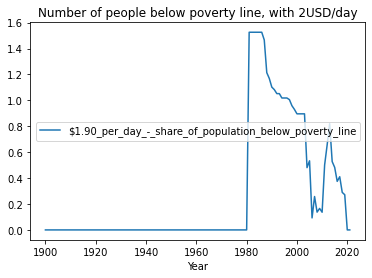

In [105]:
df.loc["Portugal"].plot(x="Year", y="$1.90_per_day_-_share_of_population_below_poverty_line", title="Number of people below poverty line, with 2USD/day")

<AxesSubplot:title={'center':'Annual CO2 emissions'}, xlabel='Year'>

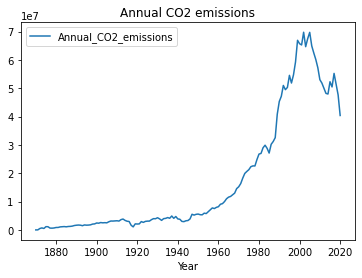

In [13]:
df.loc["Portugal"].plot(x="Year", y="Annual_CO2_emissions", title="Annual CO2 emissions")

<AxesSubplot:title={'center':'Life satisfaction index'}, xlabel='Year'>

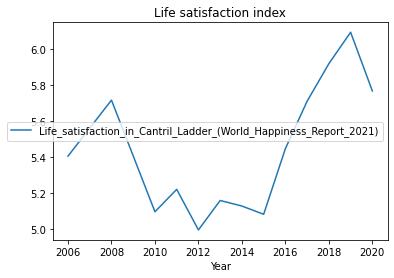

In [14]:
df.loc["Portugal"].plot(x="Year", y="Life_satisfaction_in_Cantril_Ladder_(World_Happiness_Report_2021)", title="Life satisfaction index")

<AxesSubplot:title={'center':'Life expectancy at birth'}, xlabel='Year'>

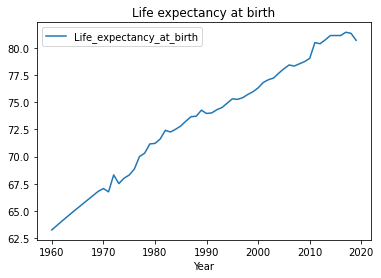

In [15]:
df.loc["Portugal"].plot(x="Year", y="Life_expectancy_at_birth", title="Life expectancy at birth")

<AxesSubplot:title={'center':'Annual working hours per worker'}, xlabel='Year'>

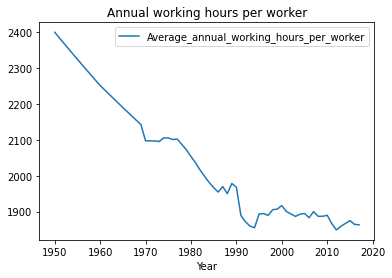

In [16]:
df.loc["Portugal"].plot(x="Year", y="Average_annual_working_hours_per_worker", title="Annual working hours per worker")

<AxesSubplot:title={'center':'Suicide mortality rate per 100k inhabitants'}, xlabel='Year'>

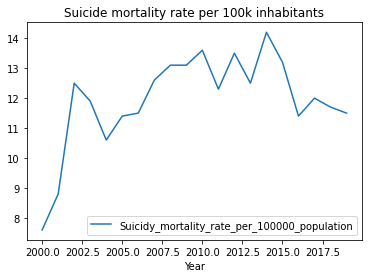

In [17]:
df.loc["Portugal"].plot(x="Year", y="Suicidy_mortality_rate_per_100000_population", title="Suicide mortality rate per 100k inhabitants")

<AxesSubplot:title={'center':'Suicide mortality rate per 100k inhabitants'}, xlabel='Year'>

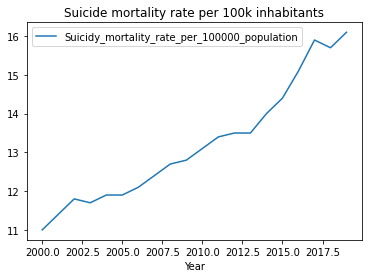

In [18]:
df.loc["United States"].plot(x="Year", y="Suicidy_mortality_rate_per_100000_population", title="Suicide mortality rate per 100k inhabitants")

<AxesSubplot:title={'center':'Avg total year of schooling'}, xlabel='Year'>

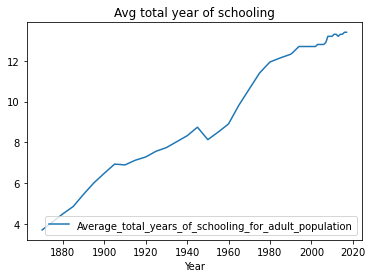

In [19]:
df.loc["United States"].plot(x="Year", y="Average_total_years_of_schooling_for_adult_population", title="Avg total year of schooling")

<AxesSubplot:title={'center':'Deaths by alcohol related disorders'}, xlabel='Year'>

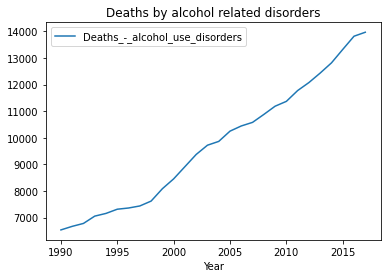

In [20]:
df.loc["United States"].plot(x="Year", y="Deaths_-_alcohol_use_disorders", title="Deaths by alcohol related disorders")

In [63]:
import matplotlib.pyplot as plt
import numpy as np

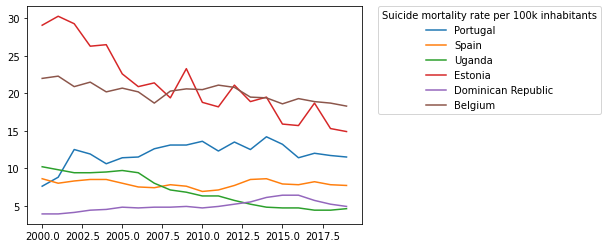

In [107]:
fig, ax = plt.subplots()
lines = ax.plot(df.loc["Portugal"]["Year"], df.loc["Portugal"]["Suicidy_mortality_rate_per_100000_population"], label="Portugal")

lines = ax.plot(df.loc["Spain"]["Year"], df.loc["Spain"]["Suicidy_mortality_rate_per_100000_population"], label="Spain")

lines = ax.plot(df.loc["Uganda"]["Year"], df.loc["Uganda"]["Suicidy_mortality_rate_per_100000_population"], label="Uganda")

lines = ax.plot(df.loc["Estonia"]["Year"], df.loc["Estonia"]["Suicidy_mortality_rate_per_100000_population"], label="Estonia")

lines = ax.plot(df.loc["Dominican Republic"]["Year"], df.loc["Dominican Republic"]["Suicidy_mortality_rate_per_100000_population"], label="Dominican Republic")

lines = ax.plot(df.loc["Belgium"]["Year"], df.loc["Belgium"]["Suicidy_mortality_rate_per_100000_population"], label="Belgium")


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Suicide mortality rate per 100k inhabitants")

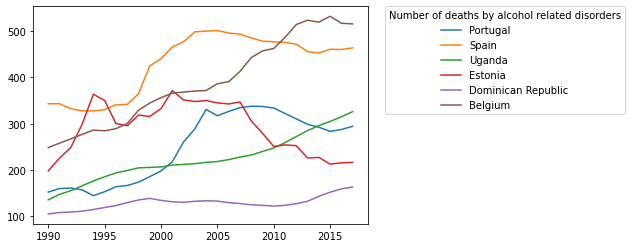

In [108]:
fig, ax = plt.subplots()
lines = ax.plot(df.loc["Portugal"]["Year"], df.loc["Portugal"]["Deaths_-_alcohol_use_disorders"], label="Portugal")

lines = ax.plot(df.loc["Spain"]["Year"], df.loc["Spain"]["Deaths_-_alcohol_use_disorders"], label="Spain")

lines = ax.plot(df.loc["Uganda"]["Year"], df.loc["Uganda"]["Deaths_-_alcohol_use_disorders"], label="Uganda")

lines = ax.plot(df.loc["Estonia"]["Year"], df.loc["Estonia"]["Deaths_-_alcohol_use_disorders"], label="Estonia")

lines = ax.plot(df.loc["Dominican Republic"]["Year"], df.loc["Dominican Republic"]["Deaths_-_alcohol_use_disorders"], label="Dominican Republic")

lines = ax.plot(df.loc["Belgium"]["Year"], df.loc["Belgium"]["Deaths_-_alcohol_use_disorders"], label="Belgium")


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Number of deaths by alcohol related disorders")

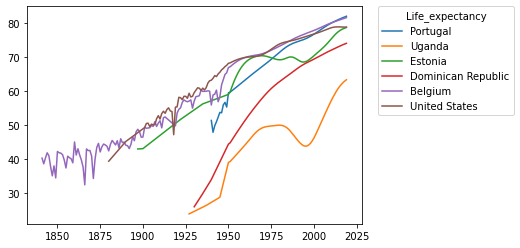

In [111]:
fig, ax = plt.subplots()
lines = ax.plot(df.loc["Portugal"]["Year"], df.loc["Portugal"]["Life_expectancy"], label="Portugal")

lines = ax.plot(df.loc["Uganda"]["Year"], df.loc["Uganda"]["Life_expectancy"], label="Uganda")

lines = ax.plot(df.loc["Estonia"]["Year"], df.loc["Estonia"]["Life_expectancy"], label="Estonia")

lines = ax.plot(df.loc["Dominican Republic"]["Year"], df.loc["Dominican Republic"]["Life_expectancy"], label="Dominican Republic")

lines = ax.plot(df.loc["Belgium"]["Year"], df.loc["Belgium"]["Life_expectancy"], label="Belgium")

lines = ax.plot(df.loc["United States"]["Year"], df.loc["United States"]["Life_expectancy"], label="United States")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Life_expectancy")

In [100]:
df.loc["India"]

,Code,Year,Number_of_executions,Deaths_-_meningitis,Deaths_-_lower_respiratory_infections,Deaths_-_intestinal_infectious_diseases,Deaths_-_protein-energy_malnutrition,Terrorism,Deaths_-_cardiovascular_diseases,Deaths_-_alzheimer_disease_and_other_dementias,...,Life_expectancy,Life_expectancy_at_birth,Share_of_population_below_poverty_line_$1.90_per_day,Life_expectancy_at_birth_total,Total_population,Human_development_index,Mortality_rate_under_5_per_1000_live_births,Suicidy_mortality_rate_per_100000_population,Annual_co2_emissions,Average_total_years_of_schooling_for_adult_population
Country,,,,,,,,,,,,,,,,,,,,,
India,IND,1990,0,103689.862224,747663.196907,120802.252062,96091.759445,907,1271309.694647,53251.535451,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
India,IND,1991,0,103928.411976,747996.126019,121546.094674,94904.52275,1113,1305340.729317,55557.372171,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
India,IND,1992,0,103037.988159,747395.509235,122246.940991,93665.090175,1152,1344348.572909,57531.084962,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
India,IND,1993,0,100293.212749,733384.996188,122539.324268,90861.687003,0,1348539.596497,58891.694744,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
India,IND,1994,0,97094.944575,720017.706883,123303.791724,88692.583649,389,1362480.346747,59887.176679,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
India,IND,2013,0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,5.8
India,IND,2014,0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,6.1
India,IND,2015,0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,6.3


In [104]:
df.loc["India"].to_html(os.path.join(datapath, "india_data.html"))

In [105]:
df.loc["Morocco"].to_html(os.path.join(datapath, "morocco_data.html"))

In [107]:
df.loc["South Korea"].to_html(os.path.join(datapath, "south_korea.html"))